In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [83]:
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
id                   100 non-null int64
diagnosis_result     100 non-null object
radius               100 non-null int64
texture              100 non-null int64
perimeter            100 non-null int64
area                 100 non-null int64
smoothness           100 non-null float64
compactness          100 non-null float64
symmetry             100 non-null float64
fractal_dimension    100 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data.iloc[:,1] = lb.fit_transform(data.iloc[:,1])

In [73]:
data.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,1,23,12,151,954,0.143,0.278,0.242,0.079
1,2,0,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,1,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,1,14,16,78,386,0.070,0.284,0.260,0.097
4,5,1,9,19,135,1297,0.141,0.133,0.181,0.059


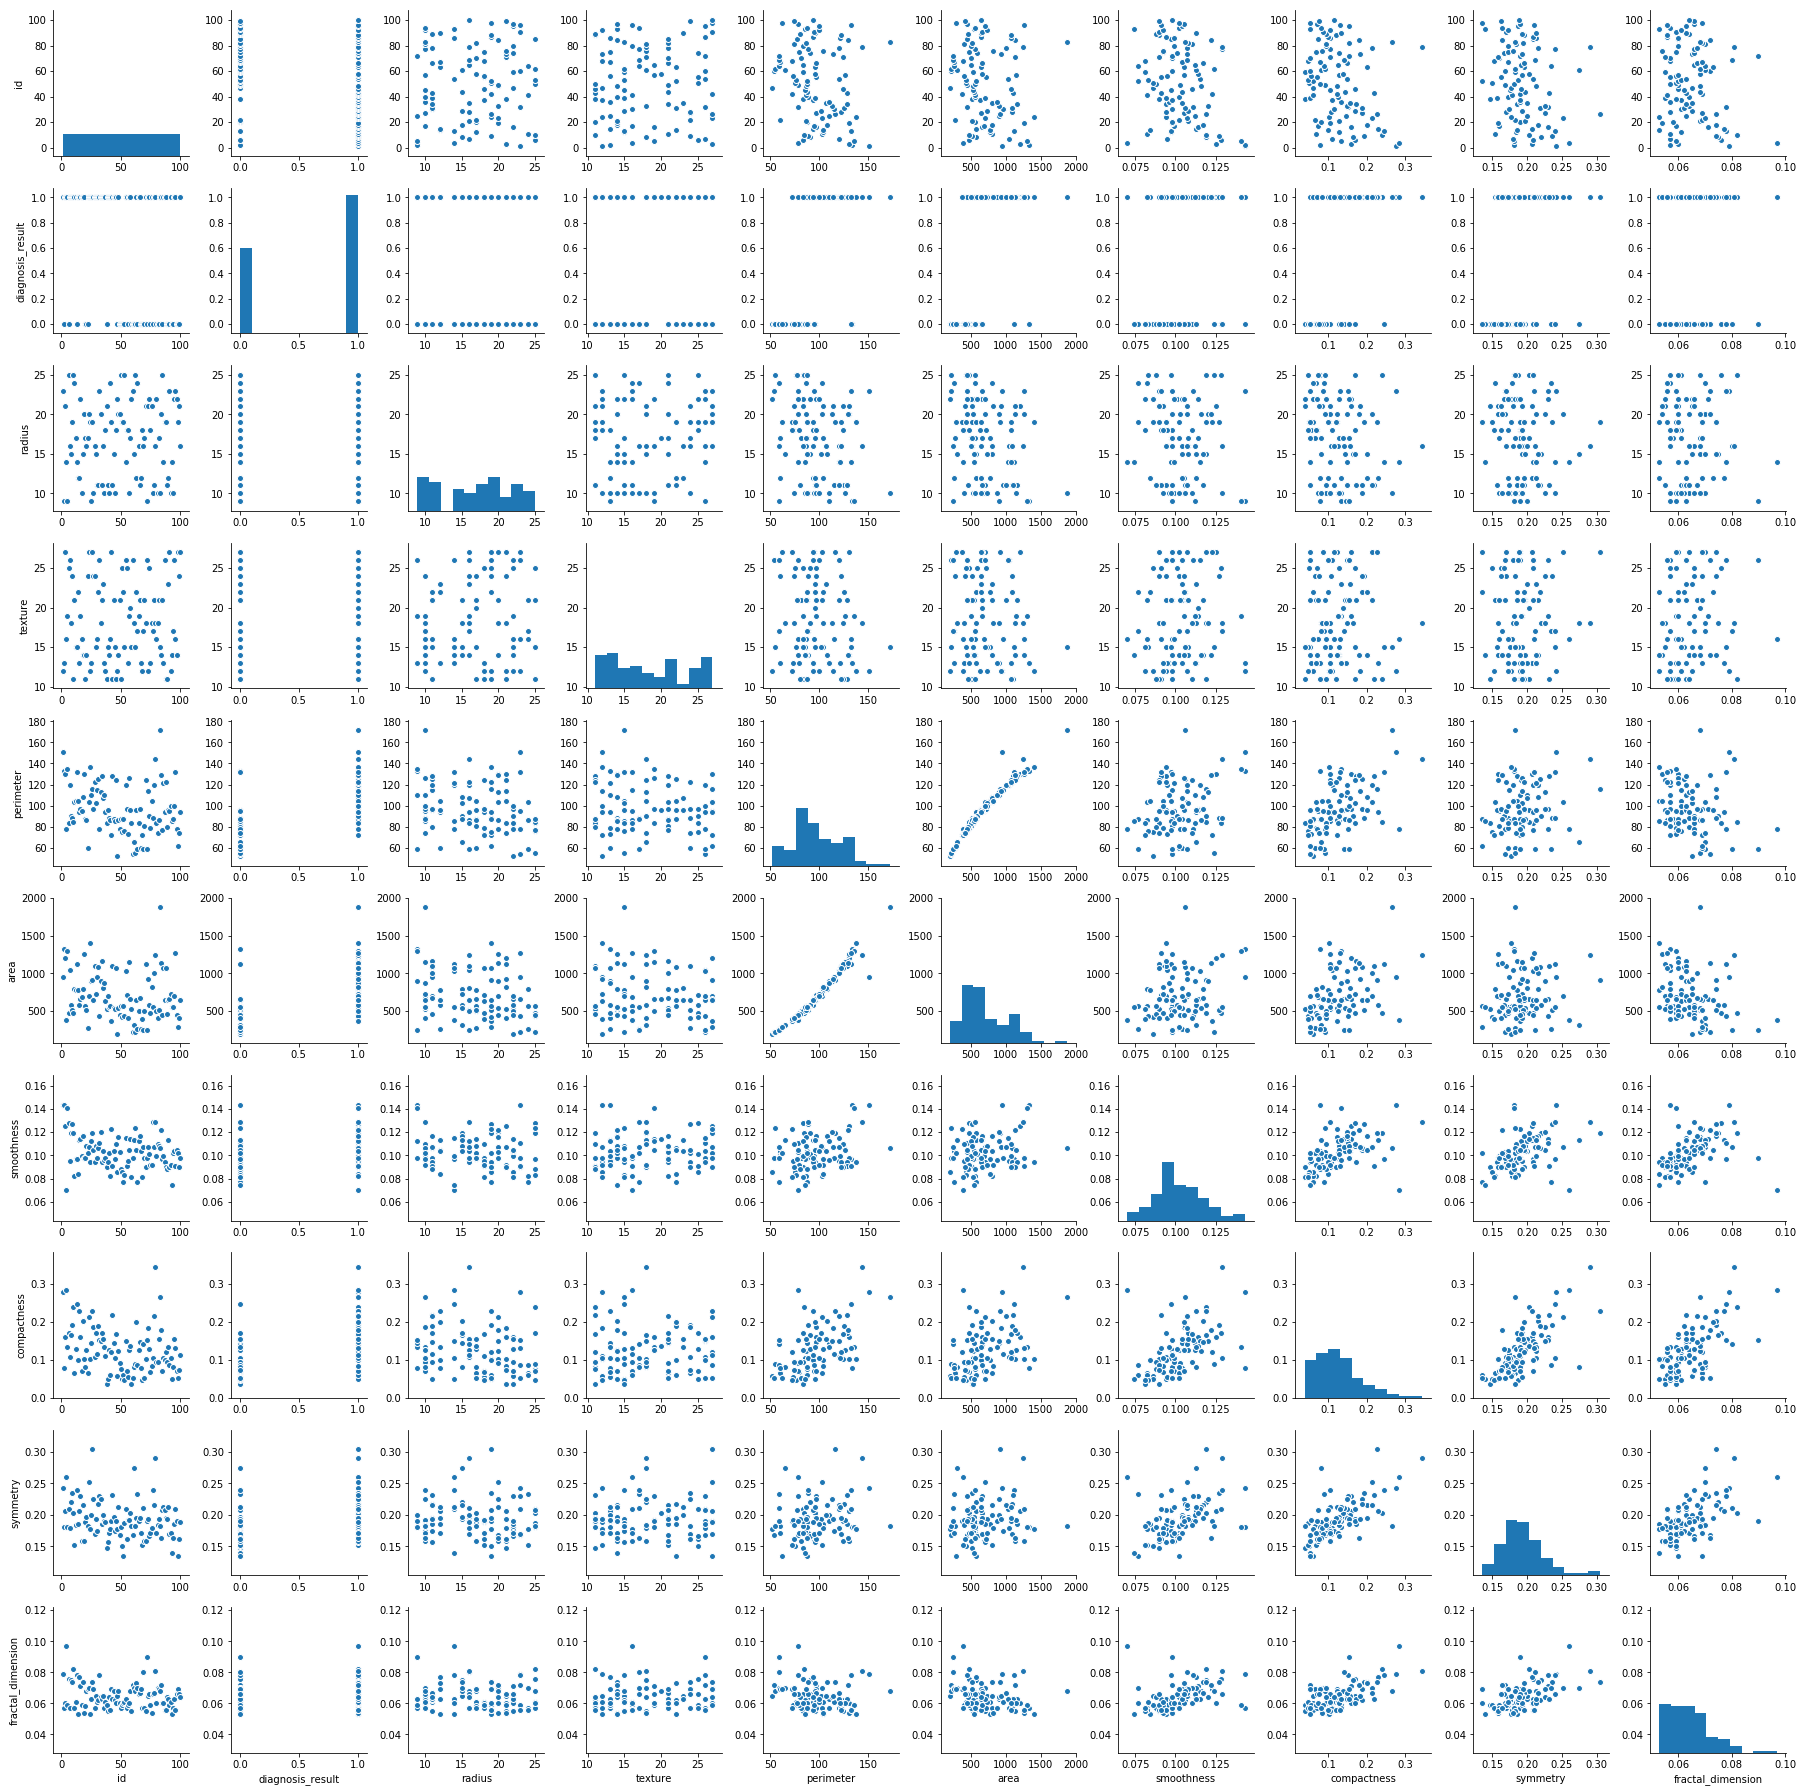

In [161]:
sns.pairplot(data);

In [35]:
from sklearn.cross_validation import train_test_split


In [36]:
data.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [148]:
y=data.loc[:,'diagnosis_result']
x=data.loc[:,['radius', 'texture','smoothness','area', 'perimeter','compactness', 'symmetry', 'fractal_dimension']]

In [184]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.40,random_state=0)

In [185]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train= sc.transform(x_train)
x_test = sc.transform(x_test)

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
model=LogisticRegression()

In [188]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [196]:
y_pred= model.predict(x_train)

In [197]:
from sklearn.metrics import confusion_matrix

In [198]:
mat=confusion_matrix(y_train,y_pred)

In [199]:
mat

array([[20,  5],
       [ 5, 30]], dtype=int64)

In [200]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

             precision    recall  f1-score   support

          0       0.80      0.80      0.80        25
          1       0.86      0.86      0.86        35

avg / total       0.83      0.83      0.83        60



In [201]:
from sklearn import metrics 

In [202]:
metrics.accuracy_score(y_train, y_pred)

0.83333333333333337